# 2. Clasificación con el Algoritmo del Perceptrón

Implementaremos una versión básica del algoritmo del perceptrón para clasificación binaria.
En esta notebook utilizaremos una version "manual" del algoritmo.
En la ntebook Ejercicios esta implementada la clase `sklearn.linear_model.Perceptron()`

En este caso los datos de entrada serán de **dos dimensiones**.

In [1]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"
import matplotlib.pyplot as plt

## Datos

Usaremos scikit-learn ([make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)) para generar datos aleatorios de dos dimensiones, divididos en dos clases etiquetadas con los valores 1 y -1.

Los datos serán linealmente separables. Fijamos la semilla aleatoria para obtener siempre los mismos resultados.

In [2]:
# vamos a generar un dataset sintetico
from sklearn.datasets import make_classification

size = 100

# notar que la variable X sera un conjunto de pares ordenados x,y que pueden ser representados como punto en un espacio de
# 2 dimensiones. Mientras que y es un conjunto de datos con valores 0 y 1 (luego lo vamos a cambiar por -1 y +1)
X, y_true = make_classification(n_samples = size,
                               n_features = 2,
                               n_classes = 2,
                               n_redundant = 0,
                               n_informative = 2,
                               n_clusters_per_class = 1,
                               class_sep = 0.5,
                               random_state = 1)

In [3]:
y_true

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [4]:
# vamos a modificar la variable y de forma tal de tener valores +1 y -1
y_true[y_true == 0] = -1
y_true

array([ 1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1])

In [5]:
type(X), X.shape, y_true.shape

(numpy.ndarray, (100, 2), (100,))

In [6]:
y_true==1

array([ True, False, False,  True,  True,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True])

Graficamos para ver el resultado. Acá, los azules son 1, los rojos -1.

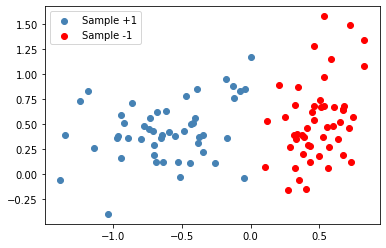

In [7]:
# graficamos los puntos correspondientes al grupo +1
plt.scatter(x = X[y_true == 1, 0],
           y = X[y_true == 1, 1],
           color = 'steelblue',
           label = 'Sample +1')

# graficamos los puntos correspondientes al grupo -1
plt.scatter(x = X[y_true == -1, 0],
           y = X[y_true == -1, 1],
           color = 'red',
           label = 'Sample -1')


plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

In [8]:
# tambien podriamos usar la clase train_test_split de sklearn. Pero en este caso elegimos hacerlo manualmente.
train_size = 60
val_size = size - train_size

X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y_true[:train_size], y_true[train_size:]

In [9]:
# recordemos que estos son pares ordenados x,y
X_train.shape, X_val.shape

((60, 2), (40, 2))

## Algoritmo del Perceptrón

### Inicialización

Comenzamos a partir de un vector cualquiera:

In [10]:
# generamos un vector de inicializacion.
# elegimos empezar con un vector 1,1 pero tambien podriamos haber comenzado en forma aleatoria
w = np.ones(2)
w

array([1., 1.])

### Predicción
Cuan acertada seria nuestra clasificacion si nuestro modelo de predccion tuviera los parametros del vector W?

Definimos la función de predicción:

In [11]:
def predict(X, w):
    return np.sign(np.dot(X, w))

Probamos predecir con el primer modelo:

In [12]:
y_pred = predict(X_val, w)
y_pred
# estos son los resultados de la clasificion que nos da nuestro modelo acutal.

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.])

In [13]:
y_val

array([-1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1])

### Evaluación

Calcularemos la "accuracy" sobre los datos de evaluación.

In [14]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum()/y_true.shape[0]


In [15]:
acc = accuracy(y_val, y_pred)
acc
# este resultado indica que con los parametros que tiene actualemente (w = (1,1)) el modelo predice correctamente solo el
# 10% de los datos de validacion.

0.1

En este caso el resultado es muy bajo.

Graficamos la frontera de decisión:

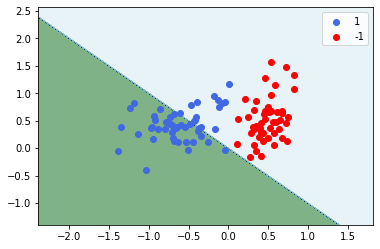

In [16]:
from utils import plot_decision_boundary
# tener presente que el archivo utils.py tiene que estar en la misma carpeta donde se esta corriendo esa notebook

def predfun(x):
    return predict(x, w)


plot_decision_boundary(predfun, 
                       X, 
                       y_true)

### Un Paso del Algoritmo

Primero debemos buscar un elemento de entrenamiento mal clasificado:

In [17]:
y_pred = predict(X_train, w)
y_pred
# son los clasificadores predichos por el algoritmo con los parametros que tenemos ahora.

array([-1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.])

In [18]:
np.where(y_train != y_pred)
# son todas las posiciones en el grupo de entrenamiento que no coinciden con los clasificadoes predichos

(array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22,
        23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 59],
       dtype=int64),)

In [19]:
y_train[0], y_pred[0]

(1, -1.0)

Tomamos el primero:

In [20]:
i = 0
xi, yi = X_train[i], y_train[i]

In [21]:
xi.shape

(2,)

Verificamos que la clasificación es incorrecta:

In [22]:
yi_pred = predict(xi, w)
yi, yi_pred

(1, -1.0)

Graficamos el punto:

Ahora actualicemos el modelo y veamos si se corrige la clasificación:

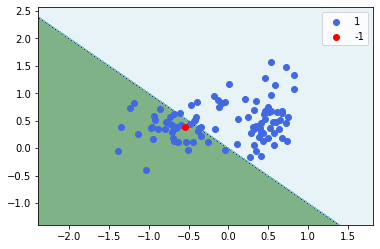

In [23]:
y2 = np.ones(size)
y2[i] = -1
plot_decision_boundary(lambda x: predict(x, w), X, y2)

Ahora actualicemos el modelo y veamos si se corrige la clasificación:

In [24]:
r = 1.0 # con esta linea definimos el valor de la taza de entrenamiento r

In [25]:
new_w = w + r * xi * yi
predict(xi, new_w)

1.0

Probemos otras tasas de aprendizaje, a ver qué pasa:

In [26]:
for r in [0.001, 0.01, 0.1, 0.5, 1.0]:
    new_w = w + r * xi * yi
    print(r, predict(xi, new_w), new_w)
    

0.001 -1.0 [0.99945051 1.00037864]
0.01 -1.0 [0.99450514 1.00378644]
0.1 -1.0 [0.94505136 1.03786438]
0.5 1.0 [0.72525681 1.1893219 ]
1.0 1.0 [0.45051362 1.3786438 ]


Lo dejamos en $r=1$. Evaluemos el nuevo modelo, para ver si mejora el resultado:

In [27]:
r = 1
new_w = w + r * xi * yi
print(r, predict(xi, new_w))

1 1.0


In [28]:
y_pred = predict(X_val, new_w)
acc = accuracy(y_val, y_pred)
acc

0.3

In [29]:
new_w

array([0.45051362, 1.3786438 ])

vemos que la precision del modelo mejoro mucho a partir de la modificacion de los parametros del vector w ([0.45051362; 1.3786438 ])

## Perceptrón: Algoritmo completo

Implementaremos el algoritmo completo, iterando hasta que todos los datos de entrenamiento estén clasificados correctamente:

In [30]:
# nuevamente comenzamos desde un vector al azar. Elegimos el vector w = 1,1
w = np.ones(2)
r = 0.5  # qué pasaría
step = 0
finished = False

while not finished:
    # 1. predecir usando el modelo actual
    y_pred = predict(X_train, w)
    y_val_pred = predict(X_val, w)
    
    # 2. evaluar
    train_acc = accuracy(y_train, y_pred)
    val_acc = accuracy(y_val, y_val_pred)
    print(f'step={step}\ttrain_acc={train_acc:0.2}\tval_acc={val_acc:0.2}')

    # 3. si no clasifica todo bien, actualizar modelo
    if (y_train == y_pred).all(): # si esta linea es True se ejecuta la linea siguiente, sino el else
        finished = True
    else:
        indices = np.where(y_train != y_pred)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + r * xi * yi
        
        step = step + 1
print(f'Parametros del modelo: {w}')

step=0	train_acc=0.17	val_acc=0.1
step=1	train_acc=0.32	val_acc=0.17
step=2	train_acc=0.37	val_acc=0.28
step=3	train_acc=0.37	val_acc=0.3
step=4	train_acc=0.48	val_acc=0.33
step=5	train_acc=0.52	val_acc=0.5
step=6	train_acc=0.78	val_acc=0.8
step=7	train_acc=0.97	val_acc=0.95
step=8	train_acc=0.87	val_acc=0.85
step=9	train_acc=1.0	val_acc=1.0
Parametros del modelo: [-0.67429978  0.02427719]


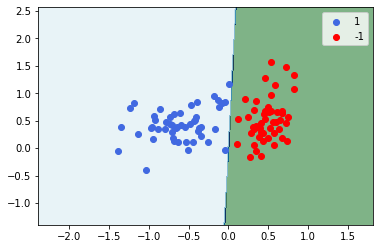

In [31]:
plot_decision_boundary(lambda x: predict(x, w), X, y_true)

## Ejercicios

1. Experimentar con otras tasas de aprendizaje.
2. Generar datos no linealmente separables (probar achicando el valor de 'class_sep' en 'make_classification').
3. Adaptar el algoritmo del perceptrón para que funcione con estos datos (ver variante "pocket" en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).
4. Hacer todo con el perceptrón de Scikit-learn ([Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)).

**Ver los ejercicio en la notebook NMA-02 Perceptron- Ejercicios**

## Referencias

- [Perceptron (Wikipedia)](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- Gallant, S. I. (1990). [Perceptron-based learning algorithms.](https://ftp.cs.nyu.edu/~roweis/csc2515-2006/readings/gallant.pdf) IEEE Transactions on Neural Networks, vol. 1, no. 2, pp. 179–191. 

Scikit-learn:

- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
- [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)
